In [1]:
!wget https://raw.githubusercontent.com/raunakbhupal/tensorflow_codes/main/extras/helper_functions.py

--2021-12-02 03:45:23--  https://raw.githubusercontent.com/raunakbhupal/tensorflow_codes/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10234 (10.0K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.99K  --.-KB/s    in 0s      

2021-12-02 03:45:23 (60.7 MB/s) - ‘helper_functions.py’ saved [10234/10234]



In [2]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [3]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2021-12-02 03:45:26--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2021-12-02 03:45:26 (99.9 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
import pandas as pd
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [7]:
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [10]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
Your PSA for the day: If a fire truck is behind you with lights going MOVE OVER!!! so they can get to their call.

---

Target: 0 (not real disaster)
Text:
whO'S THAT SHADOW HOLDIN ME HOSTAGE I'VE BEEN HERE FOR DAYS

---

Target: 1 (real disaster)
Text:
Byproduct of metal price meltdown is a higher silver price http://t.co/cZWjw4UV7i

---

Target: 0 (not real disaster)
Text:
* Screams *

---

Target: 1 (real disaster)
Text:
LONDON IS DROWNING AND IIII LIVE BY THE RIVEEEEEER

---



In [11]:
from sklearn.model_selection import train_test_split

train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                       train_df_shuffled['target'].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=42)

In [12]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [13]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [14]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [15]:
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [16]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [17]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [18]:
text_vectorizer.adapt(train_sentences)

In [19]:
sample='There is a flood in my street!'
text_vectorizer([sample])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [20]:
random_sentence=random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Lindenow: 3:15pm
Emergency crews are at a chemical spill in the main street near Church Street      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,    1,   73,  689,   22,   17,    3,  554,  385,    4,    2,
        1503,  698,  217, 1880]])>

In [21]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [22]:
from tensorflow.keras import layers

embedding=layers.Embedding(input_dim=max_vocab_length,
                           output_dim=128,
                           input_length=max_length)
embedding

In [23]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

sample_embed=embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Trusting Iran to stop terrorism is like inviting an arsonist to join the fire brigade - Telegraph http://t.co/2Z2HTDjQZD      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04847696,  0.01345145,  0.00691571, ...,  0.03215562,
          0.00167694,  0.04966791],
        [ 0.00430829,  0.04503799, -0.03401157, ...,  0.01430282,
          0.01884694, -0.00768002],
        [-0.02740541,  0.04591664,  0.00581815, ...,  0.00876485,
         -0.04308162, -0.02300758],
        ...,
        [-0.00735469,  0.0259467 ,  0.04077609, ...,  0.01296146,
          0.0404853 ,  0.0453952 ],
        [-0.00443029, -0.03881425,  0.02203045, ..., -0.0440413 ,
          0.0459833 , -0.00030657],
        [-0.02398311, -0.04043472,  0.02478255, ...,  0.00880537,
         -0.02312449,  0.04969814]]], dtype=float32)>

In [24]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.04847696,  0.01345145,  0.00691571,  0.0078759 , -0.00839764,
        0.00297011,  0.03139451,  0.02830089, -0.01223927, -0.03582867,
        0.02776879,  0.04680569, -0.00671854, -0.03183647, -0.04778929,
        0.00646464, -0.00858049, -0.03584516, -0.00214837,  0.01328185,
       -0.01674565,  0.019588  ,  0.02487311, -0.03770223, -0.02480865,
       -0.04100083, -0.03308611,  0.02695258,  0.04029082,  0.03515123,
       -0.01203196,  0.00817217,  0.04138613,  0.04463801, -0.00820148,
        0.02605799,  0.0085578 , -0.00671096,  0.02244253, -0.03302947,
       -0.04825628, -0.01858058,  0.04643491, -0.00429829,  0.01086203,
        0.03949196,  0.02658308,  0.00411153, -0.00729873,  0.04641776,
        0.04401943,  0.0128316 , -0.02325423,  0.04693509, -0.02727987,
       -0.00062628,  0.03945308,  0.04840645,  0.04742545, -0.04794438,
       -0.03017477, -0.01482065, -0.0381856 , -0.03439977,  0.00312306,
        0.035859

In [25]:
sample_embed[0][0].shape

TensorShape([128])

In [26]:
# Model 0:Baseline model
# Will use Naive Bayes algo with tfidf formula

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0=Pipeline([
                  ("tfidf",TfidfVectorizer()),
                  ("clf",MultinomialNB())
])

model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
baseline_score=model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [29]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [30]:
val_labels[:20]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [31]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [32]:
baseline_results=calculate_results(val_labels,baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [33]:
#Model 1: A simple dense model

In [34]:
from helper_functions import create_tensorboard_callback

SAVE_DIR='model_logs'

In [35]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_1=tf.keras.Model(inputs,outputs,name='model_1_dense')

In [36]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [37]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [38]:
model_1_history=model_1.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,'model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20211202-034531
Epoch 1/5
215/215 [==============================] - 4s 8ms/step - loss: 0.6127 - accuracy: 0.6914 - val_loss: 0.5412 - val_accuracy: 0.7454
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4432 - accuracy: 0.8155 - val_loss: 0.4714 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3465 - accuracy: 0.8593 - val_loss: 0.4646 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2845 - accuracy: 0.8913 - val_loss: 0.4653 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2380 - accuracy: 0.9121 - val_loss: 0.4864 - val_accuracy: 0.7848


In [39]:
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7848


[0.4864310026168823, 0.7847769260406494]

In [40]:
model_1_pred_probs=model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [41]:
model_1_pred_probs[0]

array([0.33732286], dtype=float32)

In [42]:
model_1_pred_probs[:10]

array([[0.33732286],
       [0.73940146],
       [0.99789953],
       [0.10722068],
       [0.10747224],
       [0.9187562 ],
       [0.90734404],
       [0.9929253 ],
       [0.9608234 ],
       [0.268449  ]], dtype=float32)

In [43]:
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds.shape

TensorShape([762])

In [44]:
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [45]:
model_1_results=calculate_results(val_labels,model_1_preds)

In [46]:
model_1_results

{'accuracy': 78.4776902887139,
 'f1': 0.7812916448740085,
 'precision': 0.790955383689072,
 'recall': 0.7847769028871391}

In [47]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [48]:
len(words_in_vocab),words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [49]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [51]:
embed_weights=model_1.get_layer('embedding').get_weights()
embed_weights

[array([[ 0.06622859, -0.05446697,  0.01865146, ..., -0.04095922,
          0.02432678,  0.01678941],
        [ 0.00555524,  0.00817096,  0.02734689, ..., -0.03186106,
          0.02460705, -0.00837609],
        [ 0.01211419,  0.0038186 ,  0.06003733, ..., -0.00635707,
          0.06047171,  0.06455079],
        ...,
        [-0.04332293,  0.02562721,  0.03153017, ..., -0.01141732,
          0.02526344, -0.01700072],
        [ 0.06243975, -0.05859349,  0.07844543, ..., -0.06126778,
          0.05225276,  0.04286636],
        [ 0.08298017, -0.0584838 ,  0.08231944, ..., -0.01577354,
          0.0981821 ,  0.07855871]], dtype=float32)]

In [52]:
embed_weights[0].shape

(10000, 128)

In [53]:
embed_weights[0]

array([[ 0.06622859, -0.05446697,  0.01865146, ..., -0.04095922,
         0.02432678,  0.01678941],
       [ 0.00555524,  0.00817096,  0.02734689, ..., -0.03186106,
         0.02460705, -0.00837609],
       [ 0.01211419,  0.0038186 ,  0.06003733, ..., -0.00635707,
         0.06047171,  0.06455079],
       ...,
       [-0.04332293,  0.02562721,  0.03153017, ..., -0.01141732,
         0.02526344, -0.01700072],
       [ 0.06243975, -0.05859349,  0.07844543, ..., -0.06126778,
         0.05225276,  0.04286636],
       [ 0.08298017, -0.0584838 ,  0.08231944, ..., -0.01577354,
         0.0981821 ,  0.07855871]], dtype=float32)

In [54]:
#Model 2:LSTM

In [55]:
# Create LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
#print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [56]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [57]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [58]:
model_2_history=model_2.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20211202-034559
Epoch 1/5
215/215 [==============================] - 7s 13ms/step - loss: 0.2185 - accuracy: 0.9188 - val_loss: 0.5839 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1592 - accuracy: 0.9407 - val_loss: 0.5874 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1261 - accuracy: 0.9521 - val_loss: 0.6655 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1041 - accuracy: 0.9616 - val_loss: 0.8247 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0863 - accuracy: 0.9660 - val_loss: 0.9895 - val_accuracy: 0.7769


In [59]:
model_2.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.9895 - accuracy: 0.7769


[0.9894917011260986, 0.7769029140472412]

In [60]:
model_2_pred_probs=model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[1.4584721e-03],
       [9.1923183e-01],
       [9.9976522e-01],
       [1.2438934e-02],
       [3.2730240e-04],
       [9.9888605e-01],
       [8.7942350e-01],
       [9.9983060e-01],
       [9.9972087e-01],
       [3.1758004e-01]], dtype=float32)

In [61]:
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))

In [62]:
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [63]:
model_2_results=calculate_results(val_labels,model_2_preds)

In [64]:
model_2_results

{'accuracy': 77.69028871391076,
 'f1': 0.774064384984916,
 'precision': 0.7805885493126917,
 'recall': 0.7769028871391076}

In [65]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_2_results)

Baseline accuracy: 79.27, New accuracy: 77.69, Difference: -1.57
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


In [66]:
#Model 3:GRU
#GRU has similar features to LSTM but less parameters

In [67]:
# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.GRU(64, return_sequences=True)(x) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [68]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [69]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [70]:
model_3_history=model_3.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20211202-034624
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.1629 - accuracy: 0.9323 - val_loss: 0.7293 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0839 - accuracy: 0.9698 - val_loss: 0.8061 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0698 - accuracy: 0.9740 - val_loss: 1.2098 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0592 - accuracy: 0.9761 - val_loss: 0.9588 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0545 - accuracy: 0.9775 - val_loss: 1.1108 - val_accuracy: 0.7756


In [71]:
model_3_pred_probs=model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[1.0684747e-03],
       [7.9879713e-01],
       [9.9981743e-01],
       [8.8624291e-02],
       [9.9073812e-05],
       [9.9966443e-01],
       [9.5952195e-01],
       [9.9994075e-01],
       [9.9988472e-01],
       [6.9357032e-01]], dtype=float32)

In [72]:
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [73]:
model_3_results=calculate_results(val_labels,model_3_preds)

In [74]:
model_3_results

{'accuracy': 77.55905511811024,
 'f1': 0.7733619560087615,
 'precision': 0.7777490986405654,
 'recall': 0.7755905511811023}

In [75]:
compare_baseline_to_new_results(baseline_results,model_3_results)

Baseline accuracy: 79.27, New accuracy: 77.56, Difference: -1.71
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


In [76]:
#Model 4:Bidirectional RNN

In [77]:
# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [78]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [79]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [80]:
model_4_history=model_4.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,'model_4_Bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_Bidirectional/20211202-034639
Epoch 1/5
215/215 [==============================] - 8s 20ms/step - loss: 0.1064 - accuracy: 0.9675 - val_loss: 0.9498 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0517 - accuracy: 0.9759 - val_loss: 1.1879 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0481 - accuracy: 0.9785 - val_loss: 1.3578 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0417 - accuracy: 0.9791 - val_loss: 1.6040 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0427 - accuracy: 0.9812 - val_loss: 1.4388 - val_accuracy: 0.7730


In [81]:
model_4_pred_probs=model_4.predict(val_sentences)

In [82]:
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))

In [83]:
model_4_results=calculate_results(val_labels,model_4_preds)

In [84]:
model_4_results

{'accuracy': 77.29658792650919,
 'f1': 0.7713337273803944,
 'precision': 0.7738445106757977,
 'recall': 0.7729658792650919}

In [85]:
compare_baseline_to_new_results(baseline_results,model_4_results)

Baseline accuracy: 79.27, New accuracy: 77.30, Difference: -1.97
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


In [86]:
#Model 5: Conv 1D

In [87]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [88]:
inputs=layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,kernel_size=5,activation='relu')(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_5=tf.keras.Model(inputs,outputs,name='model_5_Conv1D')

In [89]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [90]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [91]:
model_5_history=model_5.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,'model_5_Conv1D')])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20211202-034709
Epoch 1/5
215/215 [==============================] - 3s 9ms/step - loss: 0.1229 - accuracy: 0.9574 - val_loss: 0.9346 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0742 - accuracy: 0.9718 - val_loss: 1.0519 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0629 - accuracy: 0.9756 - val_loss: 1.1513 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0532 - accuracy: 0.9791 - val_loss: 1.2324 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0514 - accuracy: 0.9771 - val_loss: 1.2472 - val_accuracy: 0.7585


In [92]:
model_5_pred_probs=model_5.predict(val_sentences)

In [93]:
model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))

In [94]:
model_5_results=calculate_results(val_labels,model_5_preds)

In [95]:
model_5_results

{'accuracy': 75.8530183727034,
 'f1': 0.7568554876539897,
 'precision': 0.7590334269164114,
 'recall': 0.7585301837270341}

In [96]:
compare_baseline_to_new_results(baseline_results,model_5_results)

Baseline accuracy: 79.27, New accuracy: 75.85, Difference: -3.41
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


In [97]:
#Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [98]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01602836  0.01068851  0.02425466 -0.01405768  0.01434423  0.08292625
  0.01963371  0.06160138 -0.00352701 -0.01216413  0.00978648 -0.01248498
  0.01232342  0.09748449  0.06141113 -0.03728352  0.01860886 -0.04669853
  0.00413911 -0.06363908 -0.02469896  0.0271369   0.02284444 -0.00210023
 -0.00630592 -0.03964958  0.02220409  0.00115074 -0.03132181  0.00119528
 -0.0401255   0.04561894 -0.01530596 -0.00175917  0.02173136 -0.08450424
  0.03340028  0.04604553 -0.02480246 -0.08681665  0.00702695 -0.00770478
 -0.01434539  0.07814161 -0.10676058 -0.05152997 -0.00858158 -0.03232231
 -0.03871096  0.0258147 ], shape=(50,), dtype=float32)


In [99]:
embed_samples

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01602836,  0.01068851,  0.02425466, ...,  0.00800521,
         0.02877093, -0.01427996],
       [ 0.03596687, -0.08579469, -0.01152743, ..., -0.03414334,
         0.02816024, -0.00878941]], dtype=float32)>

In [100]:
embed_samples[0].shape

TensorShape([512])

In [101]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [102]:
model_6=tf.keras.Sequential([
                             sentence_encoder_layer,
                             layers.Dense(64,activation='relu'),
                             layers.Dense(1,activation='sigmoid')
],name='model_6_USE')

In [103]:
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [104]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [105]:
model_6_history=model_6.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,'model_6_USE')])

Saving TensorBoard log files to: model_logs/model_6_USE/20211202-034744
Epoch 1/5
215/215 [==============================] - 8s 22ms/step - loss: 0.5070 - accuracy: 0.7812 - val_loss: 0.4555 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4163 - accuracy: 0.8162 - val_loss: 0.4413 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4019 - accuracy: 0.8228 - val_loss: 0.4349 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3943 - accuracy: 0.8253 - val_loss: 0.4318 - val_accuracy: 0.8097
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3870 - accuracy: 0.8256 - val_loss: 0.4316 - val_accuracy: 0.8163


In [106]:
model_6_pred_probs=model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.1877708 ],
       [0.8160454 ],
       [0.9884172 ],
       [0.20302105],
       [0.7974322 ],
       [0.7476805 ],
       [0.98520887],
       [0.98155046],
       [0.9398531 ],
       [0.10418826]], dtype=float32)

In [107]:
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [108]:
model_6_results=calculate_results(val_labels,model_6_preds)

In [109]:
model_6_results

{'accuracy': 81.62729658792651,
 'f1': 0.8155048945282624,
 'precision': 0.8166693713681046,
 'recall': 0.8162729658792651}

In [110]:
compare_baseline_to_new_results(baseline_results,model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.63, Difference: 2.36
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.82, Difference: 0.02
Baseline f1: 0.79, New f1: 0.82, Difference: 0.03


In [111]:
#Model 7: TF Hub Pretrained USE with 10% data

In [112]:
train_sentences_90_percent,train_sentences_10_percent,train_labels_90_percent,train_labels_10_percent=train_test_split(np.array(train_sentences),
                                                                                                                       train_labels,
                                                                                                                       test_size=0.1,
                                                                                                                       random_state=42)

In [113]:
len(train_sentences),len(train_sentences_10_percent)

(6851, 686)

In [114]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [115]:
pd.Series(train_labels).value_counts()

0    3928
1    2923
dtype: int64

In [116]:
model_7=tf.keras.models.clone_model(model_6)

In [117]:
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [118]:
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [119]:
model_7_history=model_7.fit(train_sentences_10_percent,
                            train_labels_10_percent,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,'model_7_USE_10_percent')])

Saving TensorBoard log files to: model_logs/model_7_USE_10_percent/20211202-034814
Epoch 1/5
22/22 [==============================] - 5s 60ms/step - loss: 0.6696 - accuracy: 0.6939 - val_loss: 0.6517 - val_accuracy: 0.6627
Epoch 2/5
22/22 [==============================] - 1s 48ms/step - loss: 0.6041 - accuracy: 0.7799 - val_loss: 0.6018 - val_accuracy: 0.7139
Epoch 3/5
22/22 [==============================] - 1s 49ms/step - loss: 0.5302 - accuracy: 0.8192 - val_loss: 0.5473 - val_accuracy: 0.7546
Epoch 4/5
22/22 [==============================] - 1s 33ms/step - loss: 0.4664 - accuracy: 0.8236 - val_loss: 0.5180 - val_accuracy: 0.7664
Epoch 5/5
22/22 [==============================] - 1s 48ms/step - loss: 0.4204 - accuracy: 0.8397 - val_loss: 0.4952 - val_accuracy: 0.7795


In [120]:
model_7_pred_probs=model_7.predict(val_sentences)

In [121]:
model_7_preds=tf.squeeze(tf.round(model_7_pred_probs))

In [122]:
model_7_results=calculate_results(val_labels,model_7_preds)

In [123]:
model_7_results

{'accuracy': 77.95275590551181,
 'f1': 0.776722451043917,
 'precision': 0.7833144267983451,
 'recall': 0.7795275590551181}

In [124]:
compare_baseline_to_new_results(baseline_results,model_7_results)

Baseline accuracy: 79.27, New accuracy: 77.95, Difference: -1.31
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


In [125]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.477690,0.790955,0.784777,0.781292
lstm,77.690289,0.780589,0.776903,0.774064
gru,77.559055,0.777749,0.775591,0.773362
bidirectional,77.296588,0.773845,0.772966,0.771334
conv1d,75.853018,0.759033,0.758530,0.756855
tf_hub_sentence_encoder,81.627297,0.816669,0.816273,0.815505
tf_hub_10_percent_data,77.952756,0.783314,0.779528,0.776722


In [126]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

In [127]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.784777,0.790955,0.784777,0.781292
lstm,0.776903,0.780589,0.776903,0.774064
gru,0.775591,0.777749,0.775591,0.773362
bidirectional,0.772966,0.773845,0.772966,0.771334
conv1d,0.758530,0.759033,0.758530,0.756855
tf_hub_sentence_encoder,0.816273,0.816669,0.816273,0.815505
tf_hub_10_percent_data,0.779528,0.783314,0.779528,0.776722


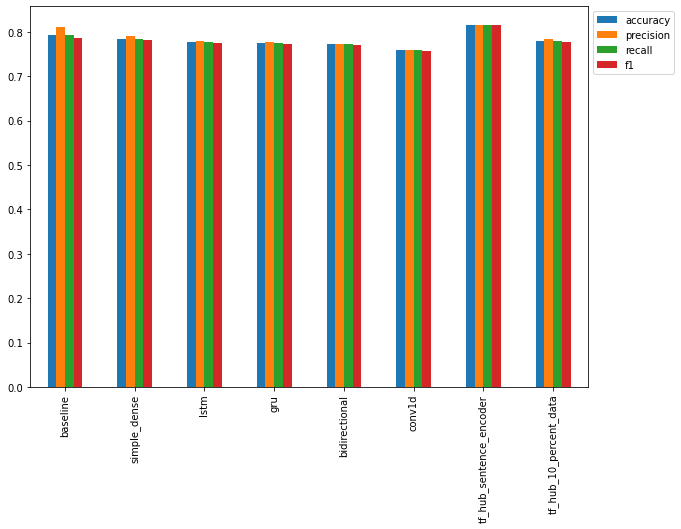

In [128]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

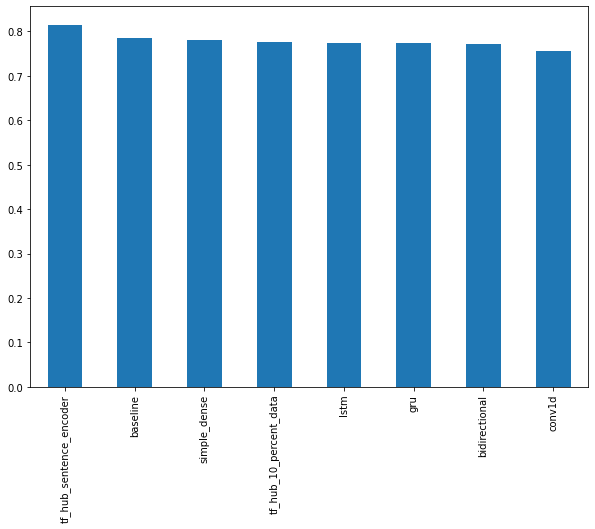

In [129]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [130]:
model_6_results

{'accuracy': 81.62729658792651,
 'f1': 0.8155048945282624,
 'precision': 0.8166693713681046,
 'recall': 0.8162729658792651}

In [131]:
model_6.save("model_6.h5")

In [132]:
loaded_model_6=tf.keras.models.load_model("model_6.h5",
                                          custom_objects={"KerasLayer":hub.KerasLayer})

In [133]:
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 17ms/step - loss: 0.4316 - accuracy: 0.8163


[0.4316161870956421, 0.8162729740142822]

In [134]:
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [136]:
loaded_model_6_SavedModel=tf.keras.models.load_model("model_6_SavedModel_format")

In [137]:
loaded_model_6_SavedModel.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4316 - accuracy: 0.8163


[0.43161624670028687, 0.8162729740142822]

In [138]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.187771
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.816045
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988417
3,@camilacabello97 Internally and externally scr...,1,0.0,0.203021
4,Radiation emergency #preparedness starts with ...,1,1.0,0.797432


In [139]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.936025
759,FedEx will no longer transport bioterror patho...,0,1.0,0.900710
628,@noah_anyname That's where the concentration c...,0,1.0,0.875138
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.869100
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.868776
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.853898
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.838749
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.829577
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.826414
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.816045


In [140]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.93602454662323
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.9007103443145752
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.875137984752655
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8690997362136841
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8687757849693298
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8538981080055237
Text:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

----

Target: 0, Pred: 1, Prob: 0.838748753070

In [141]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.0581929013133049
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.057620733976364136
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.05608167499303818
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.053508210927248
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'

----

Target: 1, Pred: 0, Prob: 0.051755376160144806
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0, Prob: 0.0454537570476532
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.03636735677719116
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl 

In [142]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [145]:
test_sentences=test_df['text'].to_list()
test_samples=random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_prob=tf.squeeze(model_6.predict([test_sample])) #has to be list
  pred=tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

Pred: 1, Prob: 0.9312680959701538
Text:
Motorcyclist bicyclist injured in Denver collision on Broadway http://t.co/eOPWBtUYr9

----

Pred: 1, Prob: 0.8047829866409302
Text:
ARSONIST Mc - CHRIST WALK http://t.co/D8LQHiGjT0 #Toronto #Columbus #Gospel

----

Pred: 1, Prob: 0.5753700137138367
Text:
Australia collapse at Trent Bridge how Twitter . On the first morning of the fourth Ashes Test... http://t.co/WAtjhzULa8

----

Pred: 1, Prob: 0.9708433747291565
Text:
Calgary takes another beating from summer storms; City activates emergency plan http://t.co/4oi9hMo7om

----

Pred: 1, Prob: 0.8863255977630615
Text:
Firefighting consumes Forest Service budget sparks political clash http://t.co/ARN8qfgNpm

----

Pred: 0, Prob: 0.1700230985879898
Text:
The Yankees are the reason I'm on blood pressure medicine

----

Pred: 0, Prob: 0.12886939942836761
Text:
Reddit Will Now Quarantine Offensive Content: Reddit co-founder and CEO Steve Huffman has unveiled more specif... http://t.co/EkZmMxU9GN

----


In [146]:
raunak_tweets = "Being too humble is not good, you have to prove you are the best"

In [151]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [152]:
predict_on_sentence(model_6,raunak_tweets)

Pred: 0.0 (not real disaster) Prob: 0.024264663457870483
Text:
Being too humble is not good, you have to prove you are the best


In [153]:
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

In [154]:
predict_on_sentence(model=model_6, 
                    sentence=beirut_tweet_1)

Pred: 1.0 (real disaster) Prob: 0.9704955220222473
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [156]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(samples) # find prediction time per sample
  return total_time, time_per_pred

In [157]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.393192929000179, 0.0005160012191603399)

In [158]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.01914558400039823, 2.5125438320732585e-05)

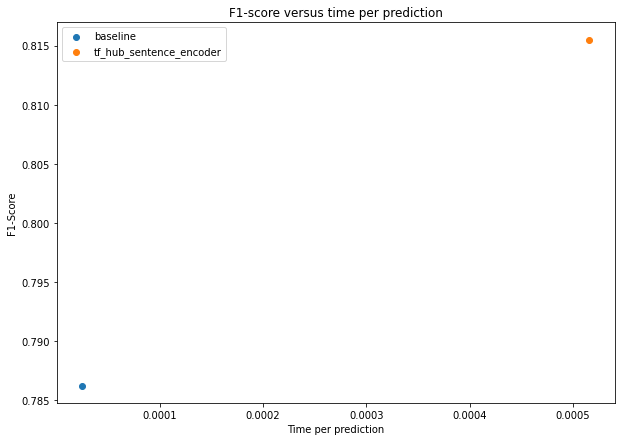

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");